<a href="https://colab.research.google.com/github/thomashollier/wallpaperTilings/blob/main/WallpaperTiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install svgwrite
!pip install drawsvg
import math
import random
import svgwrite
import drawsvg
from svgwrite import rgb
from enum import Enum
import math

seed = 0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 547.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 379.4 kB/s eta 0:00:00


In [6]:
# https://en.wikipedia.org/wiki/Wallpaper_group

class CellShape(Enum):
  SQUARE = 0
  RECTANGLE = 1
  RHOMBUS = 2
  HEX = 3

class TileShape(Enum):
  SQUARE = 0
  ISO90 = 1
  HEX = 2
  ISO60 = 3
  ISO30 = 4
  RIGHT30 = 5
  ISO = 6
  TRIPGG = 7

class Wall():
  pass

class Cell():
  """
  A cell is the same as a group. It is an arrangement of multiple tiles which as
  a group can simply be translated to make a tiling
  """

  def __init__(self, s, cellSize=[100,100]):
    eval('self.%s(cellSize = %s)' % (s,  cellSize))

  def getCellOffset(self):
    self.tileWidth = self.cellSize[0]/self.cellDimensions[0]
    self.tileHeight = self.cellSize[1]/self.cellDimensions[1]
    if self.cellShape == CellShape.SQUARE:
      self.cellOffset = self.cellSize + [0]
    elif self.cellShape == CellShape.HEX:
      cos30 = math.cos(math.radians(30))
      sin30 = math.sin(math.radians(30))
      self.cellOffset = [self.tileWidth * (2 - sin30), self.tileHeight * 2 * cos30, self.tileWidth * cos30]
    else:
      self.cellOffset = self.cellSize + [0]

  def p1(self, cellSize=[100,100]):
    self.name = 'p1'
    self.cellShape = CellShape.SQUARE
    self.cellDimensions = [1,1]
    self.cellSize = cellSize
    self.firstTilePos = (0,0)
    self.getCellOffset()

    self.tileShape = TileShape.SQUARE
    self.tile = TileSVG(self.tileShape)
    self.asmb =[
    ]

  def p2(self, cellSize=[100,100]):
    self.name = 'p2'
    self.cellShape = CellShape.SQUARE
    self.cellDimensions = [2,1]
    self.cellSize = cellSize
    self.firstTilePos = (0,0)
    self.getCellOffset()

    self.tileShape = TileShape.SQUARE
    self.tile = TileSVG(self.tileShape)
    self.asmb =[
        ('rotate(180, center=(%s, %s), tileIndex=%s)' % (self.tileWidth, self.tileHeight*.5,0))
    ]

  def pm(self, cellSize=[100,100]):
    self.name = 'pm'
    self.cellShape = CellShape.SQUARE
    self.cellDimensions = [2,1]
    self.cellSize = cellSize
    self.firstTilePos = (0,0)
    self.getCellOffset()

    self.tileShape = TileShape.SQUARE
    self.tile = TileSVG(self.tileShape)
    self.asmb =[
        ('scale(%s, center=%s, tileIndex=%s)' % ((-1,1), (self.tileWidth,0),0))
    ]

  def cm(self, cellSize=[100,100]):
    self.name = 'cm'
    self.cellShape = CellShape.SQUARE
    self.cellDimensions = [2,1]
    self.cellSize = cellSize
    self.firstTilePos = (0,0)
    self.getCellOffset()

    self.tileShape = TileShape.ISO
    self.tile = TileSVG(self.tileShape)
    self.asmb =[
        ('scale(%s, center=%s, tileIndex=%s)' % ((-1,1), (self.tileWidth,0),0))
    ]

  def pg(self, cellSize=[100,100]):
    self.name = 'pg'
    self.cellShape = CellShape.SQUARE
    self.cellDimensions = [2,1]
    self.cellSize = cellSize
    self.firstTilePos = (0,0)
    self.getCellOffset()

    self.tileShape = TileShape.SQUARE
    self.tile = TileSVG(self.tileShape)
    self.asmb =[
        ('glide((%s,%s), center=(%s,%s), tileIndex=%s)' % (self.tileWidth,0,0,self.tileHeight*.5,0))
    ]

  def p4(self, cellSize=[100,100]):
    self.name = 'p4'
    self.cellShape = CellShape.SQUARE
    self.cellDimensions = [2,2]
    self.cellSize = cellSize
    self.firstTilePos = (0,0)
    self.getCellOffset()

    self.tileShape = TileShape.SQUARE
    self.tile = TileSVG(self.tileShape)
    self.asmb =[
        ('rotate(90, center=(%s, %s), tileIndex=%s)' % (self.tileWidth, self.tileHeight, 0)),
        ('rotate(180, center=(%s, %s), tileIndex=%s)' % (self.tileWidth, self.tileHeight, 0)),
        ('rotate(270, center=(%s, %s), tileIndex=%s)' % (self.tileWidth, self.tileHeight, 0))
    ]

  def pmm(self, cellSize=[100,100]):
    self.name = 'pmm'
    self.cellShape = CellShape.SQUARE
    self.cellDimensions = [2,2]
    self.cellSize = cellSize
    self.firstTilePos = (0,0)
    self.getCellOffset()

    self.tileShape = TileShape.SQUARE
    self.tile = TileSVG(self.tileShape)
    self.asmb =[
        ('scale((-1,1), center=(%s, %s), tileIndex=%s)' % (self.tileWidth, self.tileHeight, 0)),
        ('scale((1,-1), center=(%s, %s), tileIndex=%s)' % (self.tileWidth, self.tileHeight, 0)),
        ('scale((-1,-1), center=(%s, %s), tileIndex=%s)' % (self.tileWidth, self.tileHeight,  0)),
    ]

  def pmg(self, cellSize=[100,100]):
    self.name = 'pmg'
    self.cellShape = CellShape.SQUARE
    self.cellDimensions = [2,2]
    self.cellSize = cellSize
    self.firstTilePos = (0,0)
    self.getCellOffset()

    self.tileShape = TileShape.SQUARE
    self.tile = TileSVG(self.tileShape)
    self.asmb =[
        ('scale((-1,1), center=(%s, %s), tileIndex=%s)' % (self.tileWidth, self.tileHeight, 0)),
        ('glide((%s,%s), center=(%s,%s), tileIndex=%s)' % (0,self.tileHeight, self.tileWidth*.5,self.tileHeight*.5,0)),
        ('glide((%s,%s), center=(%s,%s), tileIndex=%s)' % (0,self.tileHeight, self.tileWidth*1.5,self.tileHeight*.5,1))
    ]

  def pgg(self, cellSize=[100,100]):
    self.name = 'pgg'
    self.cellShape = CellShape.SQUARE
    self.cellDimensions = [2,2]
    self.cellSize = cellSize
    self.firstTilePos = (0,0)
    self.getCellOffset()

    self.tileShape = TileShape.TRIPGG
    self.tile = TileSVG(self.tileShape)
    self.asmb =[
      ('glide((%s,%s), center=(%s,%s), tileIndex=%s)' % (self.tileWidth,0, 0,self.tileHeight*.5,0)),
      ('glide((%s,%s), center=(%s,%s), tileIndex=%s)' % (-self.tileWidth,0, 0,self.tileHeight*.5,0)),
      ('rotate(180, center=(%s, %s), tileIndex=%s)' % (self.tileWidth, self.tileHeight, 0)),
      ('rotate(180, center=(%s, %s), tileIndex=%s)' % (self.tileWidth, self.tileHeight, 1)),
      ('rotate(180, center=(%s, %s), tileIndex=%s)' % (self.tileWidth, self.tileHeight, 2)),
    ]

  def cmm(self, cellSize=[100,100]):
    self.name = 'cmm'
    self.cellShape = CellShape.SQUARE
    self.cellDimensions = [2,2]
    self.cellSize = cellSize
    self.firstTilePos = (0,.5)
    self.getCellOffset()

    self.tileShape = TileShape.TRIPGG
    self.tile = TileSVG(self.tileShape)
    self.asmb =[
      ('rotate(180, center=(%s, %s), tileIndex=%s)' % (self.tileWidth, self.tileHeight, 0)),
      ('scale((-1,1), center=(%s, %s), tileIndex=%s)' % (0, 0, 0)),
      ('rotate(90, center=(%s, %s), tileIndex=%s)' % (0, 0, -1)),
      ('rotate(180, center=(%s, %s), tileIndex=%s)' % (self.tileWidth, self.tileHeight, 2)),
    ]

  def p4m(self, cellSize=[100,100]):
    self.name = 'p4m'
    self.cellShape = CellShape.SQUARE
    self.cellDimensions = [2,2]
    self.cellSize = cellSize
    self.firstTilePos = (0,.5)
    self.getCellOffset()

    self.tileShape = TileShape.ISO90
    self.tile = TileSVG(self.tileShape)
    self.asmb =[
        ('rotate(90, center=(%s, %s), tileIndex=%s)' % (self.tileWidth, self.tileHeight, 0)),
        ('rotate(180, center=(%s, %s), tileIndex=%s)' % (self.tileWidth, self.tileHeight, 0)),
        ('rotate(270, center=(%s, %s), tileIndex=%s)' % (self.tileWidth, self.tileHeight, 0)),
        ('scale((1,-1), center=(%s,%s), tileIndex=%s)') % (self.tileWidth, self.tileHeight, 0),
        ('rotate(90, center=(%s, %s), tileIndex=%s)' % (self.tileWidth, self.tileHeight, 4)),
        ('rotate(180, center=(%s, %s), tileIndex=%s)' % (self.tileWidth, self.tileHeight, 4)),
        ('rotate(270, center=(%s, %s), tileIndex=%s)' % (self.tileWidth, self.tileHeight, 4)),
    ]

  def p4g(self, cellSize=[100,100]):
    self.name = 'p4m'
    self.cellShape = CellShape.SQUARE
    self.cellDimensions = [2,2]
    self.cellSize = cellSize
    self.firstTilePos = (0,0)
    self.getCellOffset()

    self.tileShape = TileShape.ISO90
    self.tile = TileSVG(self.tileShape)
    self.asmb =[
        ('rotate(90, center=(%s, %s), tileIndex=%s)' % (self.tileWidth, self.tileHeight, 0)),
        ('rotate(180, center=(%s, %s), tileIndex=%s)' % (self.tileWidth, self.tileHeight, 0)),
        ('rotate(270, center=(%s, %s), tileIndex=%s)' % (self.tileWidth, self.tileHeight, 0)),
        ('glide((%s,%s), center=(%s,%s), tileIndex=%s)' % (self.tileWidth, 0, 0, self.tileHeight*.5, 0)),
        ('rotate(90, center=(%s, %s), tileIndex=%s)' % (self.tileWidth, self.tileHeight, 4)),
        ('rotate(180, center=(%s, %s), tileIndex=%s)' % (self.tileWidth, self.tileHeight, 4)),
        ('rotate(270, center=(%s, %s), tileIndex=%s)' % (self.tileWidth, self.tileHeight, 4)),
    ]

  def p3(self, cellSize=[100,100]):
    self.name = 'p3'
    self.cellShape = CellShape.HEX
    self.cellDimensions = [2,2]
    self.cellSize = cellSize
    self.firstTilePos = (0,0)
    self.getCellOffset()

    self.tileShape = TileShape.HEX
    self.tile = TileSVG(self.tileShape)
    self.asmb =[
        ('rotate(120, center=(%s, %s), tileIndex=%s)' % (self.tileWidth, self.tileHeight, 0)),
        ('rotate(240, center=(%s, %s), tileIndex=%s)' % (self.tileWidth, self.tileHeight, 0))
    ]

  def p3m1(self, cellSize=[100,100]):
    self.name = 'p3m1'
    self.cellShape = CellShape.HEX
    self.cellDimensions = [2,2]
    self.cellSize = cellSize
    self.firstTilePos = (0,0)
    self.getCellOffset()

    self.tileShape = TileShape.ISO60
    self.tile = TileSVG(self.tileShape)
    self.asmb =[
        ('rotate(120, center=(%s, %s), tileIndex=%s)' % (self.tileWidth, self.tileHeight, 0)),
        ('rotate(240, center=(%s, %s), tileIndex=%s)' % (self.tileWidth, self.tileHeight, 0)),
        ('scale((1,-1), center=(%s,%s), tileIndex=%s)') % (self.tileWidth, self.tileHeight, 0),
        ('rotate(120, center=(%s, %s), tileIndex=%s)' % (self.tileWidth, self.tileHeight, 3)),
        ('rotate(240, center=(%s, %s), tileIndex=%s)' % (self.tileWidth, self.tileHeight, 3)),
    ]

  def p31m(self, cellSize=[100,100]):
    self.name = 'p31m'
    self.cellShape = CellShape.HEX
    self.cellDimensions = [2,2]
    self.cellSize = cellSize
    self.firstTilePos = (0,0)
    self.getCellOffset()

    self.tileShape = TileShape.ISO30
    self.tile = TileSVG(self.tileShape)
    self.asmb =[
        ('rotate(120, center=(%s, %s), tileIndex=%s)' % (self.tileWidth, self.tileHeight, 0)),
        ('rotate(240, center=(%s, %s), tileIndex=%s)' % (self.tileWidth, self.tileHeight, 0)),
        ('scale((-1,1), center=(%s, %s), tileIndex=%s)' % (self.tileWidth*(1+math.cos(2*math.pi/6)), self.tileHeight, 1)),
        ('rotate(120, center=(%s, %s), tileIndex=%s)' % (self.tileWidth, self.tileHeight, 3)),
        ('rotate(240, center=(%s, %s), tileIndex=%s)' % (self.tileWidth, self.tileHeight, 3)),
    ]


  def p6(self, cellSize=[100,100]):
    self.name = 'p6'
    self.cellShape = CellShape.HEX
    self.cellDimensions = [2,2]
    self.cellSize = cellSize
    self.firstTilePos = (0,0)
    self.getCellOffset()

    self.tileShape = TileShape.ISO30
    self.tile = TileSVG(self.tileShape)
    self.asmb =[
        ('rotate(120, center=(%s, %s), tileIndex=%s)' % (self.tileWidth, self.tileHeight, 0)),
        ('rotate(240, center=(%s, %s), tileIndex=%s)' % (self.tileWidth, self.tileHeight, 0)),
        ('rotate(60, center=(%s, %s), tileIndex=%s)'  % (0, self.tileHeight, 0)),
        ('rotate(-60, center=(%s, %s), tileIndex=%s)' % ((1+math.cos(2*math.pi/6))* self.tileWidth, (1-math.sin(2*math.pi/6))* self.tileHeight, 0)  ),
        ('rotate(180, center=(%s, %s), tileIndex=%s)' % ((1+math.cos(2*math.pi/6))* self.tileWidth*.5, (1-(math.sin(2*math.pi/6))*.5)*self.tileHeight, 0)  ),
        #('rotate(240, center=(%s, %s), tileIndex=%s)' % (self.tileWidth, self.tileHeight, 3)),
        #('rotate(120, center=(%s, %s), tileIndex=%s)' % (self.tileWidth, self.tileHeight, 3)),
        #('rotate(240, center=(%s, %s), tileIndex=%s)' % (self.tileWidth, self.tileHeight, 3)),
    ]

  def p6m(self, cellSize=[100,100]):
    self.name = 'p6m'
    self.cellShape = CellShape.HEX
    self.cellDimensions = [2,2]
    self.cellSize = cellSize
    self.firstTilePos = (0,0)
    self.getCellOffset()

    self.tileShape = TileShape.RIGHT30
    self.tile = TileSVG(self.tileShape)
    self.asmb =[
        ('rotate(120, center=(%s, %s), tileIndex=%s)' % (self.tileWidth, self.tileHeight, 0)),
        ('rotate(240, center=(%s, %s), tileIndex=%s)' % (self.tileWidth, self.tileHeight, 0)),
        ('rotate(60, center=(%s, %s), tileIndex=%s)' % (0, self.tileHeight, 0)),
        ('rotate(120, center=(%s, %s), tileIndex=%s)' % (self.tileWidth, self.tileHeight, 3)),
        ('rotate(240, center=(%s, %s), tileIndex=%s)' % (self.tileWidth, self.tileHeight, 3)),
        ('scale((1,-1), center=(%s, %s), tileIndex=%s)' % (0, self.tileHeight, 3)),
        ('rotate(120, center=(%s, %s), tileIndex=%s)' % (self.tileWidth, self.tileHeight, 6)),
        ('rotate(240, center=(%s, %s), tileIndex=%s)' % (self.tileWidth, self.tileHeight, 6)),
        ('rotate(-60, center=(%s, %s), tileIndex=%s)' % (0, self.tileHeight, 8)),
        ('rotate(120, center=(%s, %s), tileIndex=%s)' % (self.tileWidth, self.tileHeight, 9)),
        ('rotate(240, center=(%s, %s), tileIndex=%s)' % (self.tileWidth, self.tileHeight, 9)),
    ]



  def render(self):
    print("This get implemented differently in child classes")


wallpaper group: p6; random seed: 14; cell size: [150, 150]


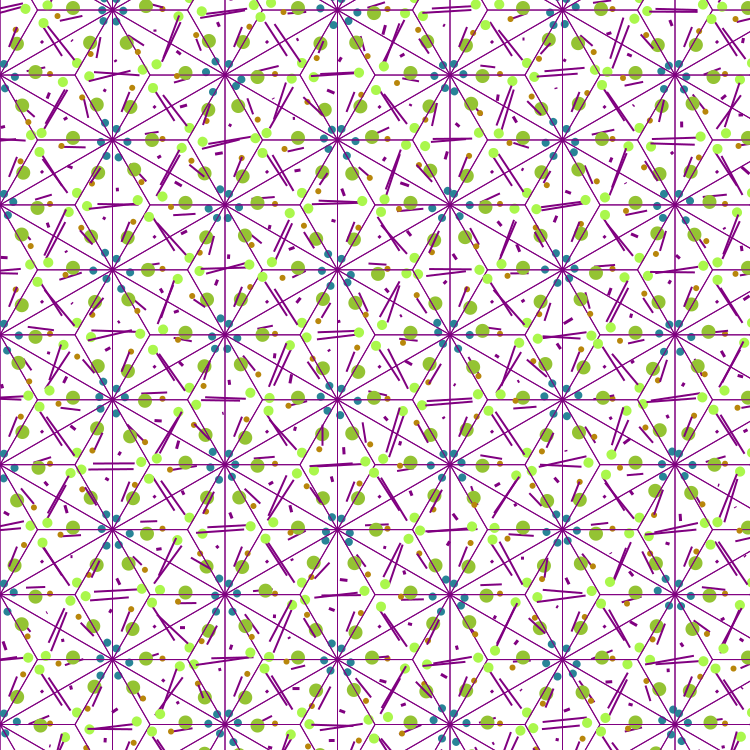

In [12]:
from pickle import TRUE
class CellSVG(Cell):
  def __init__(self, s, cellSize=[100,100], useDef = True, svgCanvas= None, clipEdges = True, border = False):
    Cell.__init__(self, s, cellSize)
    self.initCellSVG(useDef, svgCanvas, clipEdges, border)

  def initCellSVG(self, useDef, svgCanvas, clipEdges, border):
    if svgCanvas == None:
      print("Specify a canvas object")
    else:
      self.svgCanvas = svgCanvas
    self.clipEdges = clipEdges
    self.border = border

    self.tileSize = (self.cellSize[0]/self.cellDimensions[0], self.cellSize[1]/self.cellDimensions[1])
    self.tiles = []
    w = self.cellSize[0]
    h = self.cellSize[1]

    self.cellRoot = self.svgCanvas.g(id='cell-root')

    self.tileObject = TileSVG(self.svgCanvas, tileShape=self.tileShape, tileSize = self.tileSize, clipEdges = self.clipEdges, border = self.border)

    self.useDef = useDef
    if useDef:
      self.createReferenceTile()

  def createReferenceTile(self):
    self.tileDef = self.svgCanvas.g(id='tile-def')
    self.svgCanvas.defs.add(self.tileDef)
    self.tileDef.add(self.tileObject.generateTile())

  def buildNewCell(self, x, y):
    self.cellRoot = self.svgCanvas.g(id='cell-root-%s-%s'%(x,y))
    self.firstTile()
    for func in self.asmb:
      eval("self.%s" % func)
    self.wrapUp()

  def firstTile(self, tileIndex = -1):
    t = self.getNextTile(tileIndex)
    t.translate(self.firstTilePos[0]*self.cellSize[0], self.firstTilePos[1]*self.cellSize[1])
    self.tiles.append(t)
    self.cellRoot.add(self.tiles[0])

  def wrapUp(self):
    pass

  def translate(self, vec, tileIndex = 0):
    t = self.getNextTile(tileIndex)
    t.translate(vec[0]*self.cellSize[0],vec[1]*self.cellSize[1])
    self.tiles.append(t)
    self.cellRoot.add(t)

  def scale(self, vec, center=(0,0), tileIndex = 0):
    t = self.getNextTile(tileIndex)
    t.translate(center[0], center[1])
    t.scale(vec[0],vec[1])
    t.translate(-center[0], -center[1])
    self.tiles.append(t)
    self.cellRoot.add(t)

  def glide(self, vec, center=(0,0), tileIndex = 0):
    t = self.getNextTile(tileIndex)
    t.translate(vec[0],vec[1])
    if abs(vec[0]) > abs(vec[1]):
      scale = (1,-1)
    else:
      scale = (-1,1)
    t.translate(center[0], center[1])
    t.scale(scale[0],scale[1])
    t.translate(-center[0], -center[1])
    self.tiles.append(t)
    self.cellRoot.add(t)

  def rotate(self, degrees, center=(0,0), tileIndex = 0):
    t = self.getNextTile(tileIndex)
    t.rotate(degrees, (center[0], center[1]))
    self.tiles.append(t)
    self.cellRoot.add(t)
    pass

  def getNextTile(self, tileIndex):
    if self.useDef:
      if tileIndex == -1:
        t = self.svgCanvas.use(self.tileDef)
      else:
        t = self.svgCanvas.use(self.tiles[tileIndex])
    else:
      tempt = self.tileObject.generateTile()
      t = tempt
    return t



class TileSVG():
  """
  This is the smallest shape. It gets mirrored, rotated and translated in
  various ways in a tiling.
  """

  def __init__(self, dwg, tileShape=0, tileSize=(100,100), clipEdges=True, overshoot = 0, border = False):
    self.dwg = dwg
    self.tileSize = tileSize
    self.clipEdges = clipEdges
    self.overshoot = overshoot
    self.border = border
    self.randMain = random.Random()
    self.randMainSeed = random.randint(0,5000)
    self.randVar = random.Random()


    if tileShape == TileShape.SQUARE:
      self.tileShapeName = 'square'
      self.outline = [(0,0), (1,0),(1,1),(0,1)]
    elif tileShape == TileShape.ISO90:
      self.tileShapeName = 'iso90'
      self.outline = [(0,0), (1,0),(0,1)]
    elif tileShape == TileShape.HEX:
      self.tileShapeName = 'hex'
      self.outline = [(0,1),
            (math.cos(2*math.pi/6),1-math.sin(2*math.pi/6)),
            (1+math.cos(2*math.pi/6),1-math.sin(2*math.pi/6)),
            (1,1)]
    elif tileShape == TileShape.ISO60:
      self.tileShapeName = 'hex'
      self.outline = [(0,1),
            (math.cos(2*math.pi/6),1-math.sin(2*math.pi/6)),
            (1,1)]
    elif tileShape == TileShape.ISO30:
      self.tileShapeName = 'iso30'
      self.outline = [(0,1),
            (math.cos(2*math.pi/6),1-math.sin(2*math.pi/6)),
            (1+math.cos(2*math.pi/6),1-math.sin(2*math.pi/6))]
    elif tileShape == TileShape.RIGHT30:
      self.tileShapeName = 'right30'
      cos60 = math.cos(2*math.pi/6)
      sin60 = math.sin(2*math.pi/6)
      self.outline = [(0,1),
                (cos60,1- sin60),
                ((1+cos60)*.5,1-(sin60)*.5)]
    elif tileShape == TileShape.ISO:
      self.tileShapeName = 'iso'
      self.outline = [(0,.5),
                (1,0),
                (1,1)]
    elif tileShape == TileShape.TRIPGG:
      self.tileShapeName = 'tripgg'
      self.outline = [(0,1),
                (1,0),
                (2,1)]

  def generateTile(self):
    self.randMain.seed(self.randMainSeed)

    outline = [(v[0]*self.tileSize[0], v[1]*self.tileSize[1]) for v in self.outline]
    points = [ (x[0],x[1]) for x in outline]
    points.append(points[0])
    border = self.dwg.polyline(points=points, fill='none', stroke_width = 1, stroke='purple')


    xmin = 1000
    ymin = 1000
    xmax = -1000
    ymax = -1000

    for x,y in outline:
      if x < xmin:
        xmin = int(x)
      if x > xmax:
        xmax = int(x)
      if y < ymin:
        ymin = int(y)
      if y > ymax:
        ymax = int(y)

    bbox = [xmin,ymin,xmax,ymax]

    if self.clipEdges:
      tileRoot = self.dwg.g(id='tile-root', clip_path='url(#tile-clip)')
      clip_path = self.dwg.defs.add(self.dwg.clipPath(id='tile-clip'))
      clip_path.add(border)
    else:
      tileRoot = self.dwg.g(id='tile-root')



    # create straight lines
    for l in range(3):
      points = [self.mkPoint(bbox), self.mkPoint(bbox)]
      tileRoot.add(self.dwg.polyline(points=points, stroke_width = self.randMain.randint(1,3), stroke='purple'))

    tileRoot.add(self.dwg.circle(center=self.mkPoint(bbox), r = 3, fill='darkgoldenrod'))

    for x in range(3):
      col = "#%s" % ''.join([self.randMain.choice('0123456789ABCDEF') for j in range(6)])
      tileRoot.add(self.dwg.circle(center=(self.mkPoint(bbox)), r = self.randMain.randint(1,7), fill=col))

    if self.border:
      tileRoot.add(border)


    xsize = xmax-xmin
    ysize = ymax-ymin
    overshoot = self.overshoot

    xmin = int(xmin - (xsize * overshoot))
    xmax = int(xmax + (xsize * overshoot))
    ymin = int(ymin - ysize * overshoot)
    ymax = int(ymax + ysize * overshoot)

    s1 = 'M -100 -100'
    p3 = self.dwg.path(d=s1, stroke_width=1, stroke='red', fill='none')

    var = int(30*.015)
    var = 1
    line = []
    for i in [int(x*.15) for x in [50, 100, 150, 200, 250, 600]]:
      x = self.randMain.randint(i-var, i+var)
      y = self.randMain.randint(i-var, i+var)
      line.append(x)
      line.append(y)
    p3.push('T', line)
    lineRoot = tileRoot.add(self.dwg.g(id='lineRoot'))
    tileRoot.add(lineRoot)

    s1 = 'M -100 100'
    p3 = self.dwg.path(d=s1, stroke_width=1, stroke='red', fill='none')

    line = []
    for i in [int(x*.1) for x in [50, 100, 150, 200, 250, 600]]:
      x = self.randMain.randint(i-var, i+var)
      y = self.randMain.randint(i-var, (i+var))
      line.append(x)
      line.append(y)
    p3.push('T', line)
    lineRoot = tileRoot.add(self.dwg.g(id='lineRoot'))
    tileRoot.add(lineRoot)


    return tileRoot

  def mkPoint(self, bbox, var = 8):
    x = self.randMain.randint(bbox[0],bbox[2])
    xvar = self.randVar.randint(0,var)-var/2
    y = self.randMain.randint(bbox[1],bbox[3])
    yvar = self.randVar.randint(0,var)-var/2
    return (x+xvar,y+yvar)


class Canvas():
  def __init__(self, s, cellSize=[100,100], dimension = [2,2], useDef = TRUE, seed = 0, clip = True, save = False, border =  False):
    self.seed = seed
    self.tileType = s
    self.cellSize = cellSize
    self.dimension = dimension
    self.useDef = False
    self.clip = clip
    self.save = save
    self.border = border
    self.folder = "/content/drive/MyDrive/RP_Art/Wallpaper_Groups/drawings"

    import os
    os.makedirs(self.folder, exist_ok = True)

    random.seed(self.seed)
    self.fileName = ("%s/canvas_%s_%s_%sx%s_%sx%s.svg" % (self.folder, self.tileType, self.seed, self.cellSize[0], self.cellSize[1], self.dimension[0], self.dimension[1]))
    self.canvas = svgwrite.Drawing(filename=self.fileName, size=(cellSize[0]*dimension[0],cellSize[1]*dimension[1]), debug=True)
    self.cell = CellSVG(self.tileType, cellSize=self.cellSize, svgCanvas=self.canvas, useDef = False, clipEdges = self.clip, border = self.border )

    for x in range(self.dimension[0]+4):
      for y in range(self.dimension[1]+4):
        self.cell.buildNewCell(x,y)
        currentCell = self.cell.cellRoot
        if x%2 == 1:
          currentCell.translate(0, self.cell.cellOffset[2])
        currentCell.translate(self.cell.cellOffset[0] * (x-2), self.cell.cellOffset[1] * (y-2))
        self.canvas.add(currentCell)
    print("wallpaper group: %s; random seed: %s; cell size: %s" % (self.tileType, self.seed, self.cellSize))

    if self.save:
      self.saveFile()

  def saveFile(self):

    self.canvas.save(pretty=True)


  def getSVGRoot(self):
    return self.canvas


import svgwrite

for x in range(1):
  seed += 1
  canvasObj = Canvas('p6', cellSize=[150,150], dimension=[5,5], useDef = True, seed=seed, clip = False, save = True, border =  True)

canvasSVG = canvasObj.getSVGRoot()
canvasSVG




In [13]:
r = random.Random()
r2 = random.Random()
r.seed(2)
print(r.randint(1,10))
print(r.randint(1,10))
print(r.randint(1,10))
print(r.randint(1,10))
print("r2", r2.randint(1,10))
r.seed(2)
print(r.randint(1,10))
print(r.randint(1,10))
print(r.randint(1,10))
print(r.randint(1,10))
print("r2", r2.randint(1,10))



1
2
2
6
r2 3
1
2
2
6
r2 10
